In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
ss = pd.read_csv(r"C:\Users\HARSH\Desktop\python dataset\Super_Store.csv",encoding='latin1')

In [21]:
ss.head()

,Order Date,Sales
0,03-01-2014,457.568
1,03-01-2014,634.116
2,03-01-2014,362.250
3,03-01-2014,63.552
4,03-01-2014,376.509


In [4]:
ss.shape

(2121, 21)

In [10]:
ss.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,2121.0,5041.643564,2885.740258,1.0000,2568.000,5145.0000,7534.0000,9991.000
Postal Code,2121.0,55726.556341,32261.888225,1040.0000,22801.000,60505.0000,90032.0000,99301.000
Sales,2121.0,349.834887,503.179145,1.8920,47.040,182.2200,435.1680,4416.174
Quantity,2121.0,3.785007,2.251620,1.0000,2.000,3.0000,5.0000,14.000
Discount,2121.0,0.173923,0.181547,0.0000,0.000,0.2000,0.3000,0.700
Profit,2121.0,8.699327,136.049246,-1862.3124,-12.849,7.7748,33.7266,1013.127


In [11]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2121 entries, 0 to 2120
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         2121 non-null   int64  
 1   Order ID       2121 non-null   object 
 2   Order Date     2121 non-null   object 
 3   Ship Date      2121 non-null   object 
 4   Ship Mode      2121 non-null   object 
 5   Customer ID    2121 non-null   object 
 6   Customer Name  2121 non-null   object 
 7   Segment        2121 non-null   object 
 8   Country        2121 non-null   object 
 9   City           2121 non-null   object 
 10  State          2121 non-null   object 
 11  Postal Code    2121 non-null   int64  
 12  Region         2121 non-null   object 
 13  Product ID     2121 non-null   object 
 14  Category       2121 non-null   object 
 15  Sub-Category   2121 non-null   object 
 16  Product Name   2121 non-null   object 
 17  Sales          2121 non-null   float64
 18  Quantity

In [18]:
ss['Order Date'].min() , ss['Order Date'].max()

('01-01-2017', '9/30/2016')

In [19]:
ss.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [20]:
ss.drop(['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit'],axis=1 , inplace=True)

In [22]:
ss.isnull().sum()

Order Date    0
Sales         0
dtype: int64

In [23]:
ss = ss.groupby('Order Date')['Sales'].sum().reset_index()

In [24]:
ss

,Order Date,Sales
0,01-01-2017,975.4900
1,01-02-2015,452.4500
2,01-02-2016,173.9400
3,01-02-2017,913.4300
4,01-03-2015,1352.3976
...,...,...
884,9/28/2017,42.0160
885,9/29/2014,3153.3880
886,9/29/2017,553.6880
887,9/30/2014,15.2400


In [25]:
ss['Order Date'] = pd.to_datetime(ss['Order Date'])

In [26]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Order Date  889 non-null    datetime64[ns]
 1   Sales       889 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 14.0 KB


In [27]:
ss.set_index('Order Date', inplace=True)

In [28]:
ss

,Sales
Order Date,
2017-01-01,975.4900
2015-01-02,452.4500
2016-01-02,173.9400
2017-01-02,913.4300
2015-01-03,1352.3976
...,...
2017-09-28,42.0160
2014-09-29,3153.3880
2017-09-29,553.6880


<AxesSubplot:xlabel='Order Date'>

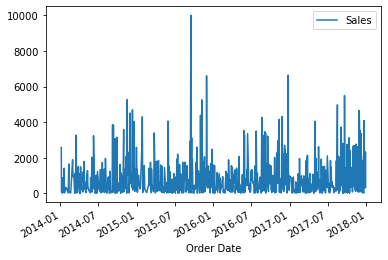

In [29]:
ss.plot()

In [30]:
# using Adfuller test to confirm if data is stationary or not
from statsmodels.tsa.stattools import adfuller

In [31]:
adfuller(ss.Sales)

(-6.225884433557737,
 5.090156819695042e-08,
 11,
 877,
 {'1%': -3.4378283848659277,
  '5%': -2.864841231335243,
  '10%': -2.5685278140988053},
 14459.826232252619)

In [58]:
y = ss['Sales'].resample('MS').mean()

In [64]:
y

Order Date
2014-01-01     480.194231
2014-02-01     367.931600
2014-03-01     857.291529
2014-04-01     567.488357
2014-05-01     432.049188
2014-06-01     695.059242
2014-07-01     601.169500
2014-08-01     457.521656
2014-09-01     992.353367
2014-10-01     769.015437
2014-11-01     980.221486
2014-12-01    1532.298325
2015-01-01     978.328467
2015-02-01     522.395667
2015-03-01     781.236437
2015-04-01     805.822962
2015-05-01     624.996700
2015-06-01     428.565500
2015-07-01     719.706316
2015-08-01     602.412012
2015-09-01    1382.790684
2015-10-01     632.980184
2015-11-01    1286.701354
2015-12-01    1049.355418
2016-01-01     508.182867
2016-02-01     356.868273
2016-03-01     609.575810
2016-04-01     695.373158
2016-05-01     687.265227
2016-06-01     816.910750
2016-07-01     768.736412
2016-08-01     734.307782
2016-09-01    1135.953371
2016-10-01     624.872474
2016-11-01    1271.345152
2016-12-01    1410.719808
2017-01-01     397.602133
2017-02-01     528.179800
2

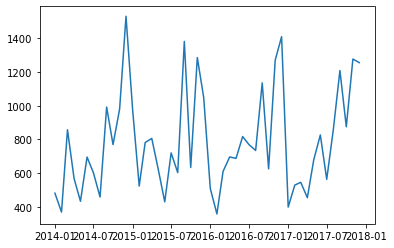

In [60]:
plt.plot(y)

In [61]:
from statsmodels.tsa.seasonal import seasonal_decompose

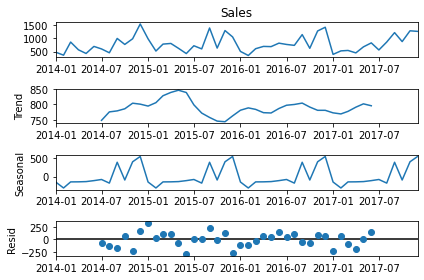

In [67]:
y_decompose = seasonal_decompose(y)
y_decompose.plot();

In [68]:
# sampling:
y_train = y.iloc[0:37] 
y_test = y.iloc[37:48] 

In [69]:
from pmdarima import auto_arima

In [142]:
auto_arima(y , seasonal=True , m=12)

ARIMA(order=(2, 0, 2), scoring_args={}, seasonal_order=(1, 1, 1, 12),
      suppress_warnings=True)

In [71]:
# now lets feed value to sarimax:--

In [72]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [143]:
model = SARIMAX(y_train, order = (2,0,2), seasonal_order=(1,1,1,12))

In [144]:
result = model.fit()

C:\Users\HARSH\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [145]:
pred_result = round(result.predict(start=37 , end = 48))
pred_result

2017-02-01     360.0
2017-03-01     841.0
2017-04-01     674.0
2017-05-01     524.0
2017-06-01     646.0
2017-07-01     664.0
2017-08-01     549.0
2017-09-01    1216.0
2017-10-01     659.0
2017-11-01    1150.0
2017-12-01    1305.0
2018-01-01     618.0
Freq: MS, Name: predicted_mean, dtype: float64

In [146]:
pred_result = pd.DataFrame(pred_result) # solved correctly
pred_result.columns = ['Predicted']
pred_result

,Predicted
2017-02-01,360.0
2017-03-01,841.0
2017-04-01,674.0
2017-05-01,524.0
2017-06-01,646.0
2017-07-01,664.0
2017-08-01,549.0
2017-09-01,1216.0
2017-10-01,659.0
2017-11-01,1150.0


In [147]:
y_test = pd.DataFrame(y_test)
y_test.columns = ['Actual']
y_test 

,Actual
Order Date,
2017-02-01,528.179800
2017-03-01,544.672240
2017-04-01,453.297905
2017-05-01,678.302328
2017-06-01,826.460291
2017-07-01,562.524857
2017-08-01,857.881889
2017-09-01,1209.508583
2017-10-01,875.362728


In [148]:
y_result = pd.DataFrame()
y_result['Actual'] =y_test['Actual']
y_result['Predicted'] = pred_result.Predicted
y_result['error'] = y_result['Actual'] - y_result['Predicted']
y_result

,Actual,Predicted,error
Order Date,,,
2017-02-01,528.179800,360.0,168.179800
2017-03-01,544.672240,841.0,-296.327760
2017-04-01,453.297905,674.0,-220.702095
2017-05-01,678.302328,524.0,154.302328
2017-06-01,826.460291,646.0,180.460291
2017-07-01,562.524857,664.0,-101.475143
2017-08-01,857.881889,549.0,308.881889
2017-09-01,1209.508583,1216.0,-6.491417
2017-10-01,875.362728,659.0,216.362728


In [149]:
from sklearn.metrics import *

In [150]:
mape = mean_absolute_percentage_error(y_result['Actual'] ,  y_result['Predicted'])*100
mape

24.790483513632093

In [151]:
accuracy = 100 - mape
accuracy

75.2095164863679

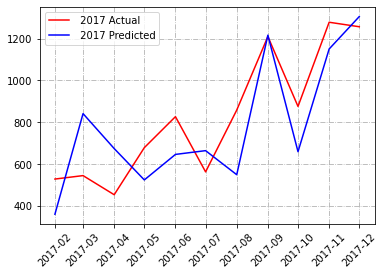

In [152]:
plt.plot(y_result['Actual'], color ='red', label=' 2017 Actual')
plt.plot(y_result['Predicted'], color ='blue', label=' 2017 Predicted')
plt.legend()
plt.grid(linestyle='-.')
plt.xticks(rotation=45);

######################################################### EDA #############################################################

In [153]:
ss = pd.read_csv(r"C:\Users\HARSH\Desktop\python dataset\Super_Store.csv",encoding='latin1')

In [169]:
import cufflinks as cf

In [170]:
from plotly.offline import download_plotlyjs , init_notebook_mode , plot , iplot
init_notebook_mode(connected= True)   ### to connect to notebook
cf.go_offline()

In [155]:
pd.set_option('display.max_columns',None)

In [162]:
ss.head()

,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,03-01-2014,03-06-2014,Second Class,Consumer,United States,Seattle,Washington,98115,West,Furniture,Chairs,457.568,2,0.2,51.4764
1,03-01-2014,03-05-2014,Standard Class,Home Office,United States,Elmhurst,Illinois,60126,Central,Furniture,Chairs,634.116,6,0.3,-172.1172
2,03-01-2014,03-05-2014,Standard Class,Consumer,United States,El Paso,Texas,79907,Central,Furniture,Chairs,362.250,6,0.3,0.0000
3,03-01-2014,03-05-2014,Standard Class,Consumer,United States,El Paso,Texas,79907,Central,Furniture,Furnishings,63.552,6,0.6,-34.9536
4,03-01-2014,03-07-2014,Standard Class,Consumer,United States,Houston,Texas,77036,Central,Furniture,Tables,376.509,3,0.3,-43.0296


In [158]:
ss['Postal Code'].value_counts()

10035    59
10024    47
10011    44
10009    42
94122    41
         ..
23602     1
6040      1
74403     1
71111     1
95207     1
Name: Postal Code, Length: 454, dtype: int64

In [159]:
ss.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [161]:
ss = ss.drop(['Row ID','Order ID','Customer ID','Customer Name','Product ID','Product Name'],axis=1)

<AxesSubplot:>

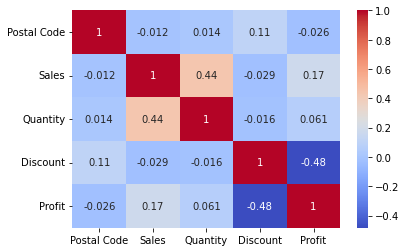

In [164]:
sns.heatmap(ss.corr(),annot=True , cmap='coolwarm')

In [165]:
ss.describe(include='object').T

,count,unique,top,freq
Order Date,2121,889,09-05-2016,10
Ship Date,2121,960,12/16/2015,10
Ship Mode,2121,4,Standard Class,1248
Segment,2121,3,Consumer,1113
Country,2121,1,United States,2121
City,2121,371,New York City,192
State,2121,48,California,444
Region,2121,4,West,707
Category,2121,1,Furniture,2121
Sub-Category,2121,4,Furnishings,957


In [177]:
ss.iplot(x = 'Segment' , y='Sales' , kind='bar' , mode='markers' , 
          xTitle='Segment',yTitle='Sales' )

In [178]:
ss.iplot(x = 'Region' , y='Sales' , kind='bar' , mode='markers' , 
          xTitle='Region',yTitle='Sales' )

In [179]:
ss.iplot(x = 'Ship Mode' , y='Sales' , kind='bar' , mode='markers' , 
          xTitle='Ship Mode',yTitle='Sales' )

In [181]:
ss.iplot(x = 'Sub-Category' , y='Sales' , kind='bar' , mode='markers' , 
          xTitle='Sub-Category',yTitle='Sales' )

<AxesSubplot:xlabel='Sub-Category', ylabel='Sales'>

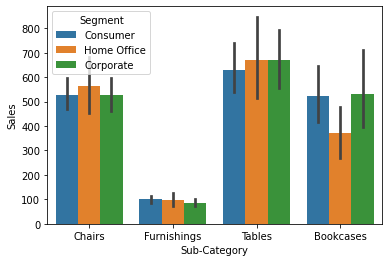

In [183]:
sns.barplot(x='Sub-Category' , y='Sales' , data=ss , hue='Segment')

<AxesSubplot:xlabel='Sub-Category', ylabel='Sales'>

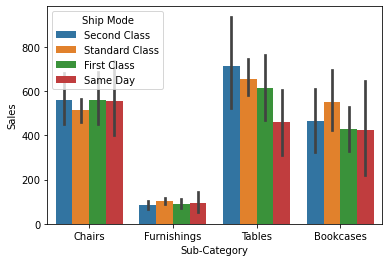

In [185]:
sns.barplot(x='Sub-Category' , y='Sales' , data=ss , hue='Ship Mode')

<AxesSubplot:xlabel='Sub-Category', ylabel='Sales'>

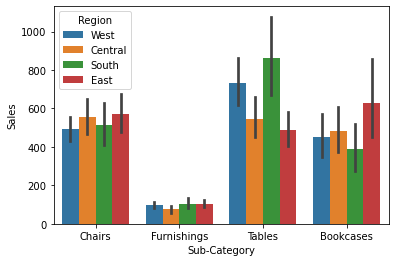

In [186]:
sns.barplot(x='Sub-Category' , y='Sales' , data=ss , hue='Region')

<AxesSubplot:xlabel='Segment', ylabel='Sales'>

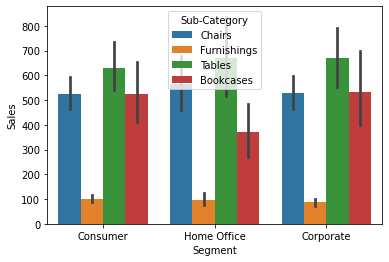

In [188]:
sns.barplot(x='Segment' , y='Sales' , data=ss , hue='Sub-Category')

In [184]:
ss.columns

Index(['Order Date', 'Ship Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Category', 'Sub-Category', 'Sales',
       'Quantity', 'Discount', 'Profit'],
      dtype='object')

#### SARIMAX MODEL considering exogenous factor:--

In [279]:
ss = pd.read_csv(r"C:\Users\HARSH\Desktop\python dataset\Super_Store.csv",encoding='latin1')

In [291]:
ss.head()

,Sales,Quantity
Order Date,,
2017-01-01,975.0,24
2015-01-02,452.0,5
2016-01-02,174.0,3
2017-01-02,913.0,5
2015-01-03,1352.0,9


In [281]:
ss.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [282]:
ss.drop([ 'Ship Date', 'Ship Mode', 'Segment', 'Country', 'City',
       'State', 'Postal Code', 'Region', 'Category', 'Sub-Category', 'Discount', 'Profit'],axis=1 , inplace=True)

In [283]:
ss.drop(['Row ID','Order ID','Customer ID','Customer Name','Product ID','Product Name'],axis=1 , inplace=True)

In [285]:
ss = round(ss.groupby('Order Date').agg({'Sales': 'sum', 'Quantity': 'sum'})).reset_index()

In [264]:
ss.set_index('Order Date', inplace=True)

In [252]:
pd.set_option('display.max_rows',None)

In [290]:
ss.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 889 entries, 2017-01-01 to 2016-09-30
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Sales     889 non-null    float64
 1   Quantity  889 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 20.8 KB


In [288]:
ss['Order Date'] = pd.to_datetime(ss['Order Date'])

In [289]:
ss.set_index('Order Date', inplace=True)

In [309]:
y1 = round(pd.DataFrame(ss['Sales'].resample('MS').sum()))

In [310]:
y2 = round(pd.DataFrame(ss['Quantity'].resample('MS').sum()))

In [311]:
y1['Quantity'] = ss['Quantity']

In [312]:
y1['Quantity'] = y2['Quantity']

In [313]:
y1

,Sales,Quantity
Order Date,,
2014-01-01,6243.0,70
2014-02-01,1840.0,23
2014-03-01,14572.0,131
2014-04-01,7944.0,81
2014-05-01,6913.0,97
2014-06-01,13205.0,122
2014-07-01,10820.0,114
2014-08-01,7319.0,107
2014-09-01,23816.0,208


In [353]:
# sampling:
y1_train = y1.iloc[0:37] 
y1_test = y1.iloc[37:48] 

In [381]:
y1_train

,Sales,Quantity
Order Date,,
2014-01-01,6243.0,70
2014-02-01,1840.0,23
2014-03-01,14572.0,131
2014-04-01,7944.0,81
2014-05-01,6913.0,97
2014-06-01,13205.0,122
2014-07-01,10820.0,114
2014-08-01,7319.0,107
2014-09-01,23816.0,208


In [354]:
auto_arima(ss['Sales'] , seasonal=True , m=12, exogenous = ss[['Quantity']])

ARIMA(order=(1, 1, 2), scoring_args={}, seasonal_order=(1, 0, 0, 12),
      suppress_warnings=True, with_intercept=False)

In [355]:
model2 = SARIMAX(y1_train['Sales'] , order = (1,1,2), seasonal_order=(1,0,0,12),exog = y1_train[['Quantity']] )

In [358]:
result2  = model2.fit()

In [360]:
y1_test['Sales'].shape

(11,)

In [382]:
y1_test['Quantity'].shape

(11,)

In [385]:
# Extract the last 12 values for prediction
exog_forecast = y1_train[['Quantity']].iloc[-12:]

In [386]:
pred_result2 = result2.predict(start = 37 , end = 48 , exog = exog_forecast)

In [387]:
pred_result2

2017-02-01     4617.117619
2017-03-01    14392.974995
2017-04-01    12977.814680
2017-05-01    16438.302528
2017-06-01    11353.075411
2017-07-01    14142.974610
2017-08-01    10101.371944
2017-09-01    27536.813852
2017-10-01    16461.096003
2017-11-01    31281.983832
2017-12-01    34277.940768
2018-01-01     6498.039923
Freq: MS, Name: predicted_mean, dtype: float64

In [392]:
y1_result = pd.DataFrame()
y1_result['Actual'] = y1_test['Sales']
y1_result['Predicted_X'] = pred_result2
y1_result 

,Actual,Predicted_X
Order Date,,
2017-02-01,6868.0,4617.117619
2017-03-01,10894.0,14392.974995
2017-04-01,9065.0,12977.814680
2017-05-01,16958.0,16438.302528
2017-06-01,19008.0,11353.075411
2017-07-01,11812.0,14142.974610
2017-08-01,15443.0,10101.371944
2017-09-01,29030.0,27536.813852
2017-10-01,21881.0,16461.096003


In [393]:
mean_absolute_percentage_error(y1_result['Actual'] , y1_result['Predicted_X'] )*100

23.669119796007944

In [394]:
accuracy_x = 100-mape
accuracy_x

75.2095164863679

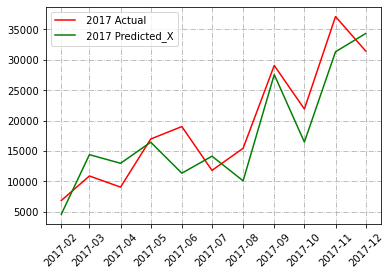

In [395]:
plt.plot(y1_result['Actual'] , color ='red', label=' 2017 Actual')
plt.plot(y1_result['Predicted_X'], color ='green', label=' 2017 Predicted_X')
plt.legend()
plt.grid(linestyle='-.')
plt.xticks(rotation=45);